[[100.          10.          10.          10.          50.        ]
 [100.          51.2785875   34.52968085  33.93777123  50.        ]
 [100.          61.49396657  43.04348469  40.46460157  50.        ]
 [100.          51.79491409  34.92888729  33.91822609  50.        ]
 [100.          10.          10.          10.          50.        ]]


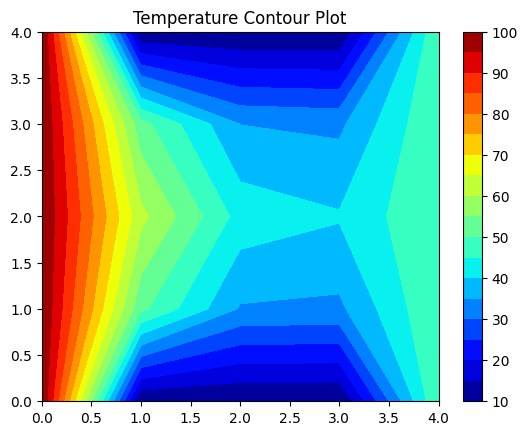

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Grid size
nx, ny = 5, 5
dx = dy = 1.0
T = np.zeros((nx, ny))

# Set boundary conditions
T[:, 0] = 100
T[:, -1] = 50
T[0, 1:4] = 10
T[-1, 1:4] = 10

def update_temperature(T, dx, dy):
    new_T = T.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            new_T[i, j] = (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - dx*dy*np.sin(i*dx + j*dy)) / 4.0
    return new_T

# Number of iterations
n_iterations = 1000

for _ in range(n_iterations):
    T = update_temperature(T, dx, dy)
print(T)
# Create a contour plot
plt.contourf(T, levels=20, cmap='jet')
plt.colorbar()
plt.title('Temperature Contour Plot')
plt.show()

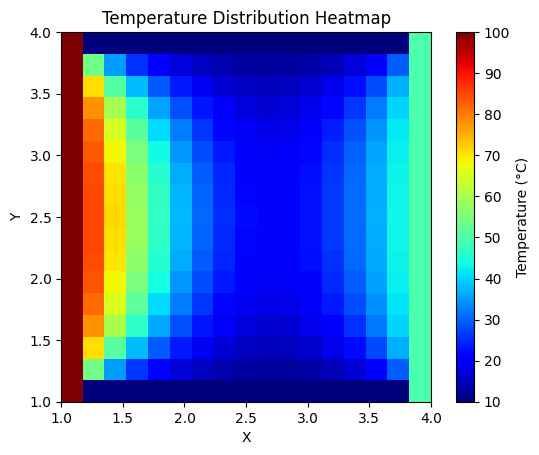

[[100.          10.          10.          10.          10.
   10.          10.          10.          10.          10.
   10.          10.          10.          10.          10.
   10.          50.        ]
 [100.          53.96520548  35.17714612  25.91238462  20.58640503
   17.21152434  14.98611384  13.54728176  12.71587052  12.40308274
   12.57849891  13.27036831  14.60064754  16.89516856  21.01434284
   29.42485111  50.        ]
 [100.          70.71325686  50.93755955  38.06127914  29.45407327
   23.54949647  19.4912113   16.80913724  15.2396225   14.63844194
   14.94561296  16.18339049  18.48606417  22.1751266   27.90049192
   36.79636644  50.        ]
 [100.          78.05884047  60.05027256  46.31827285  36.09772571
   28.59393578  23.2193217   19.57822123  17.41242409  16.56057291
   16.93774113  18.53227524  21.41697077  25.76901917  31.87364093
   40.0162411   50.        ]
 [100.          81.65464122  65.27260339  51.62700782  40.72944044
   32.31570338  26.08180859  21.76376

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
grid_size = 4  # Size of the grid
cell_size = 0.25  # Size of each cell
dx = cell_size  # Grid spacing in the x-direction
dy = cell_size  # Grid spacing in the y-direction

# Create a grid
x = np.linspace(1, grid_size, int(grid_size / cell_size) + 1)
y = np.linspace(1, grid_size, int(grid_size / cell_size) + 1)
X, Y = np.meshgrid(x, y)

# Initialize temperature values
T = np.zeros_like(X)

# Define a stable source term
source_term = np.sin(X + Y)  # Using the sine function as the source term

# Set boundary conditions
T[0, :] = 10  # Left boundary
T[-1, :] = 10  # Right boundary
T[:, 0] = 100  # Bottom boundary
T[:, -1] = 50  # Top boundary

# Set the time step (smaller values may improve stability)
dt = 0.001

# Solve for the temperature using finite differences
num_iterations = 1000  # Number of iterations for convergence
for _ in range(num_iterations):
    T_new = T.copy()
    for i in range(1, T.shape[0] - 1):
        for j in range(1, T.shape[1] - 1):
            # Apply finite difference method with modified time step
            T_new[i, j] = T[i, j] + dt * (
                (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2 +
                (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2 +
                source_term[i, j]
            )
    T = T_new
# Create a heatmap of the temperature distribution using the "jet" colormap
plt.imshow(T, cmap='jet', origin='lower', extent=[x[0], x[-1], y[0], y[-1]])
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Distribution Heatmap')
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()
print(T)